## HR Analytics
#### Let's find out what kind of people tend to look for job changes more.
#### https://github.com/minjookim1223/ITP-449-Machine-Learning.git


### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import data from the csv file.
We can also check out the dataframe using df.info(), df.head(), df.shape

In [2]:
df = pd.read_csv("hr.csv")
df.head()

,enrollee_id,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36,1
1,29725,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,47,0
2,11561,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,never,83,0
3,33241,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,Pvt Ltd,never,52,1
4,666,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   enrollee_id          19158 non-null  int64 
 1   city                 19158 non-null  object
 2   gender               14650 non-null  object
 3   relevent_experience  19158 non-null  object
 4   enrolled_university  18772 non-null  object
 5   education_level      18698 non-null  object
 6   major_discipline     16345 non-null  object
 7   experience           19093 non-null  object
 8   company_type         13018 non-null  object
 9   last_new_job         18735 non-null  object
 10  training_hours       19158 non-null  int64 
 11  target               19158 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


df.shape

### Let's check if there are any null values

In [4]:
df.isnull().sum()

enrollee_id               0
city                      0
gender                 4508
relevent_experience       0
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_type           6140
last_new_job            423
training_hours            0
target                    0
dtype: int64

It seems like there are a lot of null values. Let us drop them all for now. Also, we can call df.drop_duplicates() to remove any duplicates, if there is any

In [5]:
df = df.dropna().drop_duplicates()
df

,enrollee_id,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
1,29725,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,47,0
4,666,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0
7,402,city_46,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,Pvt Ltd,>4,18,1
8,27107,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,Pvt Ltd,1,46,1
11,23853,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,Male,No relevent experience,Full time course,Graduate,STEM,1,Pvt Ltd,1,52,1
19149,251,city_103,Male,Has relevent experience,no_enrollment,Masters,STEM,9,Pvt Ltd,1,36,1
19150,32313,city_160,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,Public Sector,3,23,0
19152,29754,city_103,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,Funded Startup,1,25,0


### Let's reword the columns for readability

In [6]:
# Clean the column names
df.columns = ["enrollee_id", "city", "gender" , "relevant_experience", "university", "education", "major", "experience", "company_type", "last_new_job", "training_hours", "target"]

df.head()

,enrollee_id,city,gender,relevant_experience,university,education,major,experience,company_type,last_new_job,training_hours,target
1,29725,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,47,0
4,666,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0
7,402,city_46,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,Pvt Ltd,>4,18,1
8,27107,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,Pvt Ltd,1,46,1
11,23853,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,Pvt Ltd,1,108,0


### Let's also clean a few column data for better readability

In [7]:
# Clean the relevant experience column
# df.loc[df["relevant_experience"] == "No relevent experience", 'relevant experience'] = "No"
# df.loc[df["relevant_experience"] == "Has relevent experience", 'relevant experience'] = "Yes"

# Clean the university column
df.loc[df["university"] == "no_enrollment", 'university'] = "None"
df.loc[df["university"] == "Part time course", 'university'] = "Part time"
df.loc[df["university"] == "Full time course", 'university'] = "Full time"

target_df = df
target_df

,enrollee_id,city,gender,relevant_experience,university,education,major,experience,company_type,last_new_job,training_hours,target
1,29725,city_40,Male,No relevent experience,None,Graduate,STEM,15,Pvt Ltd,>4,47,0
4,666,city_162,Male,Has relevent experience,None,Masters,STEM,>20,Funded Startup,4,8,0
7,402,city_46,Male,Has relevent experience,None,Graduate,STEM,13,Pvt Ltd,>4,18,1
8,27107,city_103,Male,Has relevent experience,None,Graduate,STEM,7,Pvt Ltd,1,46,1
11,23853,city_103,Male,Has relevent experience,None,Graduate,STEM,5,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,Male,No relevent experience,Full time,Graduate,STEM,1,Pvt Ltd,1,52,1
19149,251,city_103,Male,Has relevent experience,None,Masters,STEM,9,Pvt Ltd,1,36,1
19150,32313,city_160,Female,Has relevent experience,None,Graduate,STEM,10,Public Sector,3,23,0
19152,29754,city_103,Female,Has relevent experience,None,Graduate,Humanities,7,Funded Startup,1,25,0


### We wil reset the index for cleaner data

In [8]:
# Reset index
target_df = target_df.reset_index(drop=True)
target_df

,enrollee_id,city,gender,relevant_experience,university,education,major,experience,company_type,last_new_job,training_hours,target
0,29725,city_40,Male,No relevent experience,None,Graduate,STEM,15,Pvt Ltd,>4,47,0
1,666,city_162,Male,Has relevent experience,None,Masters,STEM,>20,Funded Startup,4,8,0
2,402,city_46,Male,Has relevent experience,None,Graduate,STEM,13,Pvt Ltd,>4,18,1
3,27107,city_103,Male,Has relevent experience,None,Graduate,STEM,7,Pvt Ltd,1,46,1
4,23853,city_103,Male,Has relevent experience,None,Graduate,STEM,5,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9233,21319,city_21,Male,No relevent experience,Full time,Graduate,STEM,1,Pvt Ltd,1,52,1
9234,251,city_103,Male,Has relevent experience,None,Masters,STEM,9,Pvt Ltd,1,36,1
9235,32313,city_160,Female,Has relevent experience,None,Graduate,STEM,10,Public Sector,3,23,0
9236,29754,city_103,Female,Has relevent experience,None,Graduate,Humanities,7,Funded Startup,1,25,0


### Now, let's count each element in every column

In [9]:
# Let's check how many males and females are interested in Data Science
target_df["gender"].value_counts()

Male      8312
Female     843
Other       83
Name: gender, dtype: int64

#### It seems like there are significantly more male than female within data science industry.

In [10]:
# Let's check how many people have relevant experience or not
target_df["relevant_experience"].value_counts()

Has relevent experience    7997
No relevent experience     1241
Name: relevant_experience, dtype: int64

#### Most people in this dataset have relevant data science experience.

In [11]:
# Let's check if an enrollment in a university helps
target_df["university"].value_counts()

None         7750
Full time     942
Part time     546
Name: university, dtype: int64

#### Most of the candidates are not currently enrolled in a college course. That makes sense, as most of the candidates had relevant data science experience.

In [12]:
# What about education level?
target_df["education"].value_counts()

Graduate    6453
Masters     2520
Phd          265
Name: education, dtype: int64

#### All of the candidates are on Graduate+ levels

In [13]:
# What about major?
target_df["major"].value_counts()

# They higly prefer STEM majors, but it's not impossible to get a job without a STEM major

STEM               8245
Humanities          390
Other               184
Business Degree     172
Arts                133
No Major            114
Name: major, dtype: int64

#### It is obvious that majority of the people are from STEM majors

#### The number of experience is categorial data in this case, so I changed >20 and <1 values to 21 and 0 respectively for better readability

In [14]:
# What about number of experience?
series = target_df["experience"]
series.loc[series == ">20"] = "21"
series.loc[series == "<1"] = "0"
series = series.astype(int)
series.sort_values().tail(20)
data = series.value_counts().sort_index()
data

c:\users\minjo\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0      101
1      129
2      315
3      452
4      504
5      602
6      554
7      502
8      409
9      549
10     567
11     383
12     296
13     240
14     341
15     409
16     311
17     212
18     170
19     182
20      87
21    1923
Name: experience, dtype: int64

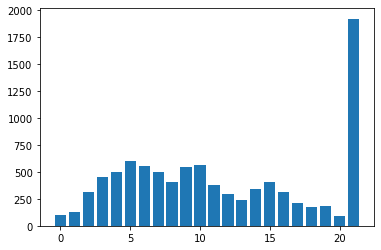

In [15]:
plt.bar(range(22), data)
plt.show()

#### People are mostly in their mid-career. However, we have to proceed with caution as "21" is actually 21+. 

In [16]:
target_df["experience"] = series
target_df

,enrollee_id,city,gender,relevant_experience,university,education,major,experience,company_type,last_new_job,training_hours,target
0,29725,city_40,Male,No relevent experience,None,Graduate,STEM,15,Pvt Ltd,>4,47,0
1,666,city_162,Male,Has relevent experience,None,Masters,STEM,21,Funded Startup,4,8,0
2,402,city_46,Male,Has relevent experience,None,Graduate,STEM,13,Pvt Ltd,>4,18,1
3,27107,city_103,Male,Has relevent experience,None,Graduate,STEM,7,Pvt Ltd,1,46,1
4,23853,city_103,Male,Has relevent experience,None,Graduate,STEM,5,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9233,21319,city_21,Male,No relevent experience,Full time,Graduate,STEM,1,Pvt Ltd,1,52,1
9234,251,city_103,Male,Has relevent experience,None,Masters,STEM,9,Pvt Ltd,1,36,1
9235,32313,city_160,Female,Has relevent experience,None,Graduate,STEM,10,Public Sector,3,23,0
9236,29754,city_103,Female,Has relevent experience,None,Graduate,Humanities,7,Funded Startup,1,25,0


### Let's group by each column to see the average data value

In [17]:
target = target_df.groupby("target").mean()
target = target.reset_index()
target["target"] = target["target"].apply(str)
target

,target,enrollee_id,experience,training_hours
0,0,16677.088857,12.169624,65.401227
1,1,17576.789072,8.646125,63.323380


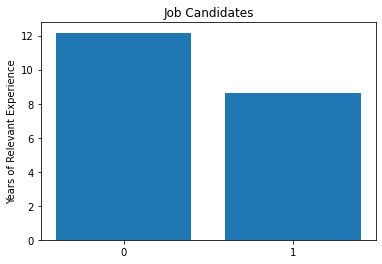

In [18]:
plt.bar(target["target"], target.experience)
plt.ylabel("Years of Relevant Experience")
plt.title("Job Candidates")
plt.show()

#### Those with less experience tend to look for jobs more than those who don't.

In [19]:
target_df.groupby("university").mean()

,enrollee_id,experience,training_hours,target
university,,,,
Full time,17513.905520,6.996815,66.493631,0.297240
None,16673.101290,12.313161,64.876258,0.156000
Part time,17883.591575,8.899267,64.978022,0.155678


In [20]:
gender = target_df.groupby("gender").mean()
gender

,enrollee_id,experience,training_hours,target
gender,,,,
Female,16934.549229,9.772242,67.042705,0.174377
Male,16825.749278,11.753609,64.907363,0.169995
Other,16236.409639,11.361446,58.783133,0.168675


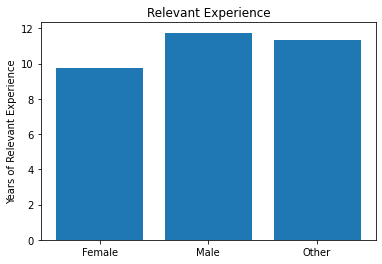

In [21]:
plt.bar(gender.index, gender.experience)
plt.ylabel("Years of Relevant Experience")
plt.title("Relevant Experience")
plt.show()

#### Females tend to have a bit less experience than males. It is possible that females took more training hours to compensate for lack of experience.

In [22]:
experience = target_df.groupby("relevant_experience")["training_hours"].mean()
experience

relevant_experience
Has relevent experience    65.553583
No relevent experience     61.784045
Name: training_hours, dtype: float64

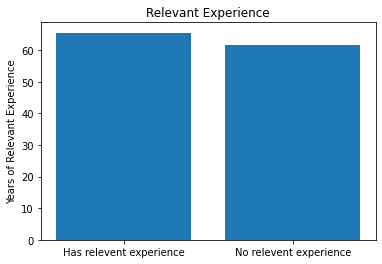

In [23]:
plt.bar(experience.index, experience)
plt.ylabel("Years of Relevant Experience")
plt.title("Relevant Experience")
plt.show()

#### Those who have relevant experience tend to have accumulated more training hours, thought there isn't a significant difference.

In [24]:
education = target_df.groupby("education").mean()
education

,enrollee_id,experience,training_hours,target
education,,,,
Graduate,17072.293972,10.913219,65.674880,0.179606
Masters,16461.417063,12.737302,63.179365,0.150794
Phd,14448.267925,16.437736,67.524528,0.132075


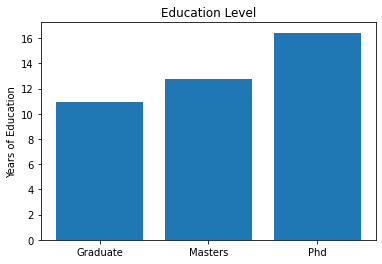

In [25]:
plt.bar(education.index, education["experience"])
plt.ylabel("Years of Education")
plt.title("Education Level")
plt.show()

#### Those who have higher education tend to have more experience and training hours. They are also less likely to find jobs.

### Drop enrollee id.

In [26]:
target_df.drop('enrollee_id', axis =1, inplace=True)
target_df

,city,gender,relevant_experience,university,education,major,experience,company_type,last_new_job,training_hours,target
0,city_40,Male,No relevent experience,None,Graduate,STEM,15,Pvt Ltd,>4,47,0
1,city_162,Male,Has relevent experience,None,Masters,STEM,21,Funded Startup,4,8,0
2,city_46,Male,Has relevent experience,None,Graduate,STEM,13,Pvt Ltd,>4,18,1
3,city_103,Male,Has relevent experience,None,Graduate,STEM,7,Pvt Ltd,1,46,1
4,city_103,Male,Has relevent experience,None,Graduate,STEM,5,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...
9233,city_21,Male,No relevent experience,Full time,Graduate,STEM,1,Pvt Ltd,1,52,1
9234,city_103,Male,Has relevent experience,None,Masters,STEM,9,Pvt Ltd,1,36,1
9235,city_160,Female,Has relevent experience,None,Graduate,STEM,10,Public Sector,3,23,0
9236,city_103,Female,Has relevent experience,None,Graduate,Humanities,7,Funded Startup,1,25,0


### Re-engineer all the features

In [27]:
# Change all values to numerical

# Cities
cities = []

for i in target_df['city']:
    num = ''
    for j in range(0, len(i)):
        if i[j].isnumeric():
            num += i[j]
    cities.append(int(num))

target_df["city"] = cities

# Gender: 0 for Male, 1 for Female, 2 for Other
target_df["gender"] = [ 0 if gender == "Male"
                        else 1 if gender == "Female"
                        else 2 for gender in target_df["gender"]]

# Relevant experience: 1 for Yes, 0 for No
target_df["relevant_experience"] = [0 if relevant_experience == "No relevent experience"
                        else 1 for relevant_experience in target_df["relevant_experience"]]

# University: 0 for None, 1 for Full time, 2 for Part time
target_df["university"] = [ 0 if university == "None"
                        else 1 if university == "Full time"
                        else 2 for university in target_df["university"]]

# Education level: 0 for primary school, 1 for high school, 2 for graduate, 3 for masters, 4 for phd
target_df["education"] = [0 if education == "Primary School"
                       else 1 if education == 'High School'
                       else 2 if education == 'Graduate'
                       else 3 if education == "Masters"
                       else 4 for education in target_df["education"]]

# Major: 0 for for no major, 1 for humanities, 2 for arts, 3 for business degree, 4 for everything else
target_df["major"] = [0 if major == "No Major"
                       else 1 if major == 'Humanities'
                       else 2 if major == 'Arts'
                       else 3 if major == "Business Degree"
                       else 4 for major in target_df["major"]]



# Company type: 0: Early Startup, 1: Funded Startup, 2: NGO, 3: Public Sector, 4: Pvt Ltd, 5: Other
target_df["company_type"] = [0 if company_type == "Early Stage Startup"
                             else 1 if company_type == 'Funded Startup'
                             else 2 if company_type == 'NGO'
                             else 3 if company_type == "Public Sector"
                             else 4 if company_type == "Pvt Ltd"
                             else 5 for company_type in target_df["company_type"]]

target_df["last_new_job"] = [1 if last_new_job == "1"
                             else 2 if last_new_job == '2'
                             else 3 if last_new_job == '3'
                             else 4 if last_new_job == "4"
                             else 5 if last_new_job == "5"
                             else 0 if last_new_job == 'never'
                             else 6 for last_new_job in target_df["last_new_job"]]


target_df.head()

,city,gender,relevant_experience,university,education,major,experience,company_type,last_new_job,training_hours,target
0,40,0,0,0,2,4,15,4,6,47,0
1,162,0,1,0,3,4,21,1,4,8,0
2,46,0,1,0,2,4,13,4,6,18,1
3,103,0,1,0,2,4,7,4,1,46,1
4,103,0,1,0,2,4,5,4,1,108,0


### Train and split the data

In [28]:
from sklearn.model_selection import train_test_split

X = target_df.drop(labels = "target", axis = 1)
y = target_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=30)

### Compute the baseline classification accuracy for X_train

In [29]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
base_acc = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", base_acc)

Baseline Accuracy =  0.8297258297258298


## Ensemble Learning

### We can apply Bootstrap Aggregation

In [30]:
def create_bootstrap_sample(df):
    return df.sample(n= df.shape[0], replace = True)

bootstrap_sample = create_bootstrap_sample(X_train)

print('Number of rows should be the same:')
print('Number of rows in X_train:  ', X_train.shape[0])
print('Number of rows in bootstrap:', create_bootstrap_sample(X_train).shape[0])

print(bootstrap_sample)

Number of rows should be the same:
Number of rows in X_train:   6466
Number of rows in bootstrap: 6466
      city  gender  relevant_experience  university  education  major  \
1834    16       1                    1           0          3      4   
1460   160       0                    1           0          2      4   
913     64       0                    0           0          2      4   
8808   160       0                    1           0          2      4   
5415   104       0                    1           1          2      4   
...    ...     ...                  ...         ...        ...    ...   
7978   138       1                    1           0          2      4   
3096   103       0                    1           0          2      4   
5034   114       0                    1           0          2      4   
3625   103       0                    1           0          2      4   
1638   103       0                    1           0          2      4   

      experience  co

### Now apply the BaggingClassifier to fit a model

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_bag = BaggingClassifier(random_state = 42)
model_bag.fit(X_train, y_train)
pred_bag = model_bag.predict(X_test)
acc_bag = accuracy_score(y_test, pred_bag)

print('Accuracy =', acc_bag)

Accuracy = 0.8405483405483406


### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

model_rf = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)

In [35]:
round(accuracy_score(y_test, model_rf.predict(X_test)),4)

0.8326

### Out-of-Bag Evaluation

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_rf_oob = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t', oob_score)
print('Testing Accuracy:\t', acc_oob)
print('Acc. Difference:\t', diff_oob)

OOB Score:		 0.833
Testing Accuracy:	 0.8449
Acc. Difference:	 0.0119


### AdaBoosting

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_est = DecisionTreeClassifier (max_depth =2)

ada_boost1 = AdaBoostClassifier(base_est, n_estimators=500, random_state=42, learning_rate=.05)
ada_boost1.fit(X_train, y_train)

ada_boost2 = AdaBoostClassifier(base_est, n_estimators=20, random_state=42, learning_rate=.5)
ada_boost2.fit(X_train, y_train)

res1 = round(recall_score(y_test, ada_boost1.predict(X_test)),4)
res2 = round(recall_score(y_test, ada_boost2.predict(X_test)),4)

print('MODEL 1 Recall:\t {}'.format(res1))
print('MODEL 2 Recall:\t {}:'.format(res2))

MODEL 1 Recall:	 0.3877
MODEL 2 Recall:	 0.3856:


### GBT

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

recall_gbc = round(recall_score(y_test, gbc_pred),4)

precision_gbc = round(precision_score(y_test, gbc_pred),4)

print('Recall :\t', recall_gbc)
print('Precision :\t', precision_gbc)

## Let's find the feature importance

In [38]:
feature_importance = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importance}).nlargest
print(df)

<bound method DataFrame.nlargest of               features  importance
0                 city    0.283157
1               gender    0.022288
2  relevant_experience    0.020650
3           university    0.025713
4            education    0.037172
5                major    0.018381
6           experience    0.156949
7         company_type    0.050042
8         last_new_job    0.079277
9       training_hours    0.306372>


## Finally, we can use the voting classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

rf_clf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees. 
svm_clf = SVC(probability=True, random_state=0) # probability calculation
log_clf = LogisticRegression(random_state=0)

# constructing the ensemble classifier by mentioning the individual classifiers.
classifier = VotingClassifier(estimators = [('rf',rf_clf), ('svm',svm_clf), ('log', log_clf)], voting='soft') 

# train the ensemble classifier
classifier.fit(X_train, y_train)

classifier_pred = classifier.predict(X_test)
recall_voting = recall_score(y_test, classifier_pred)
precision_voting = precision_score(y_test, classifier_pred)
print('Accuracy score:', accuracy_score(y_test, classifier_pred))

c:\users\minjo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 0.8297258297258298


### Random Forest Model had the best accuracy with .938